In [180]:
import numpy as num
import pandas as pd 
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn import svm

##Cleaning the data, removing null rows 
df=pd.read_csv("MLData.csv")
df= df.dropna()
#displaying the data
df.head()



,date,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Target
6,1/10/2017,7.36,169.00,18.80,2897671.00,97,29.0,16.1882,389.60
16,1/24/2017,7.63,169.00,18.80,2876141.00,94,23.7,16.0644,386.62
169,8/25/2017,8.11,175.76,19.31,3029710.00,94,18.9,15.7504,410.64
178,9/7/2017,8.11,175.76,19.31,2934716.00,99,23.9,15.1715,395.54
247,12/13/2017,9.10,178.47,20.05,3392755.59,94,11.9,18.1726,461.17


Now, I will be creating a correlation matrix. This will show me which values in the data most heavily effect the outcome. This way, I will get a good idea of which Features to use to train my model.

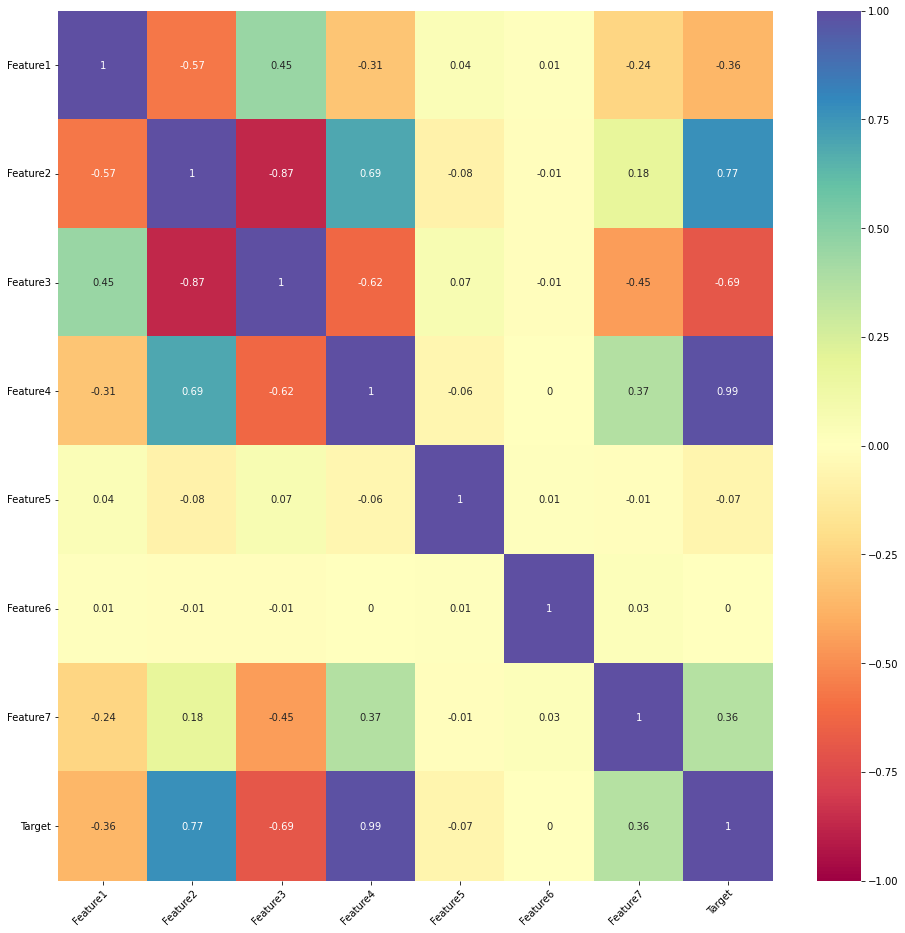

In [125]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr().round(decimals=2), annot=True, center=0.0, vmin=-1.0, vmax=1.0, robust=True, cmap="Spectral")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(rotation='horizontal', rotation_mode="anchor")
plt.show()

 As seen by the matrix, values that are close to 1 or -1 have the higest correlation. These are colored in red, orange, green or blue. Very high correlation is colored in purple. 

The features that show the best correlations are Feature 1, Feature 2, Feature 3, Feature 4 and Feature 7. I will use these features to build my models. I will not be using Features 5 and 6 because they do not seem to heavily effect my data. 

In [126]:
#dropping Feature 5 
df.drop('Feature5',axis=1,inplace=True)


In [127]:
#dropping feature 6
df.drop('Feature6',axis=1,inplace=True)


In [128]:
#Displaying the data with the dropped values
df.head()

,date,Feature1,Feature2,Feature3,Feature4,Feature7,Target
6,1/10/2017,7.36,169.00,18.80,2897671.00,16.1882,389.60
16,1/24/2017,7.63,169.00,18.80,2876141.00,16.0644,386.62
169,8/25/2017,8.11,175.76,19.31,3029710.00,15.7504,410.64
178,9/7/2017,8.11,175.76,19.31,2934716.00,15.1715,395.54
247,12/13/2017,9.10,178.47,20.05,3392755.59,18.1726,461.17


In [129]:
#Now, I am defining my x data set and y data set.
#We want to predict the target value using the Features. 
#Hence, the features are our x data, and the Target is our y data. 

x_data = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature7']]
y_data= df['Target']

In [130]:
#this splits the data into testing and training data 
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, random_state=0)




In [131]:
#Here, I am defining my regression model as a Liner Regressor 
regression_model=LinearRegression()
#Feeding †he model my x training data and y training data
regression_model.fit(X_train,y_train)


LinearRegression()

In [132]:
#Now, I am using my regressor to predict the values using my testing data 
predicted_values=regression_model.predict(X_test)

In [133]:
#Now, I am creating a table to show my actual values vs my predicted ones
dfframe=pd.DataFrame(y_test, predicted_values)
dfr= pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
print(dfr)

     Actual   Predicted
916  381.12  381.387664
552  434.12  431.804424
830  376.60  380.833901
437  471.96  477.480151
995  410.10  414.024060
..      ...         ...
735  477.97  473.765768
423  465.69  470.609089
846  346.02  344.788059
568  429.74  427.226000
636  452.63  451.220569

[225 rows x 2 columns]


## Creating a Decision Tree Regressor 


In [179]:

#Loading up my x data 
x_data = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature7']]
#Loading up my Y data, what I want to predict 
y_data= df['Target']
#importing the Decision Tree Regressor Model 
from sklearn.tree import DecisionTreeRegressor
#creating the Decision Tree 
dt=DecisionTreeRegressor(random_state=50)
#loading in my x and y data 
#this splits the data into testing and training data, just like we did in linear regression 
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, random_state=0)
#feeding this data in my model 
dt.fit(X_train,y_train) 
#now, predicting values 
y_pred_dt= dt.predict(X_test)
#creating a table to display results
dfframe=pd.DataFrame(y_test, y_pred_dt)
dfr2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print(dfr2)

     Actual  Predicted
916  381.12     381.75
552  434.12     433.10
830  376.60     375.84
437  471.96     472.47
995  410.10     408.67
..      ...        ...
735  477.97     478.62
423  465.69     463.08
846  346.02     350.26
568  429.74     429.74
636  452.63     452.62

[225 rows x 2 columns]
